# Experiments

Here are other (useful?) experiments to draw some statistics from these models. I believe all of these can be done even more efficiently. One idea that cam with Dan is: What about producing a lot of simulations using GPU (JAX allowing that) and then train a normalizing flow to learn the posterior? This could be done for different kind of spot distribution too.

Anyway, let's start simple


In [8]:
import numpy as np
from spotter import Star, butterfly, uniform
import matplotlib.pyplot as plt

star = Star(u=[0.1, 0.2], N=2**5)
amplitude = star.jax_amplitude(20)

draws = 100_000

In what follows, each exepriment is about 6 x 100 000 draws (i.e. amplitudes evaluations), each takes about 1 minute and 20 seconds on my laptop.

## Contrast

In [2]:
results = {}

for c in np.linspace(0.01, 1, 5):
    A = []
    for i in range(draws):
        star.clear_surface()
        theta, phi = uniform(5)
        star.add_spot(theta, phi, 0.1, c)
        A.append([theta[0], phi[0], amplitude(star.map_spot)])
    A = np.array(A)
    results[c] = A

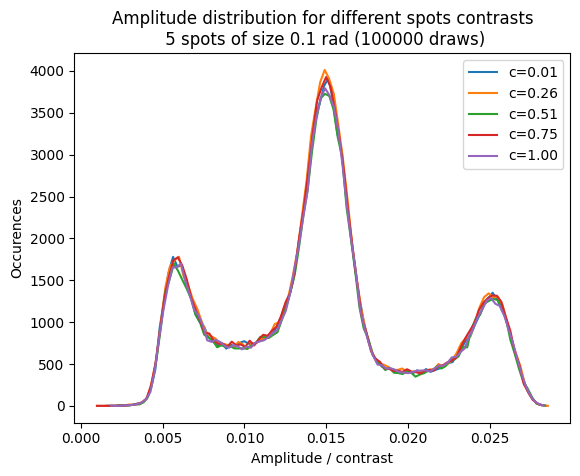

In [3]:
for c, A in results.items():
    x, bins = np.histogram(A[:, 2], bins=100)
    plt.plot(bins[:-1] / c, x, label=f"c={c:.2f}")

plt.legend()
plt.xlabel("Amplitude / contrast")
plt.ylabel("Occurences")
plt.title(
    f"Amplitude distribution for different spots contrasts\n 5 spots of size 0.1 rad ({draws} draws)"
)
plt.savefig("spotter_contrast_experiement.pdf")

## Number

In [4]:
results = {}

for n in range(2, 8):
    A = []
    for i in range(draws):
        star.clear_surface()
        theta, phi = uniform(n)
        star.add_spot(theta, phi, 0.1, 0.1)
        A.append([theta[0], phi[0], amplitude(star.map_spot)])
    A = np.array(A)
    results[n] = A

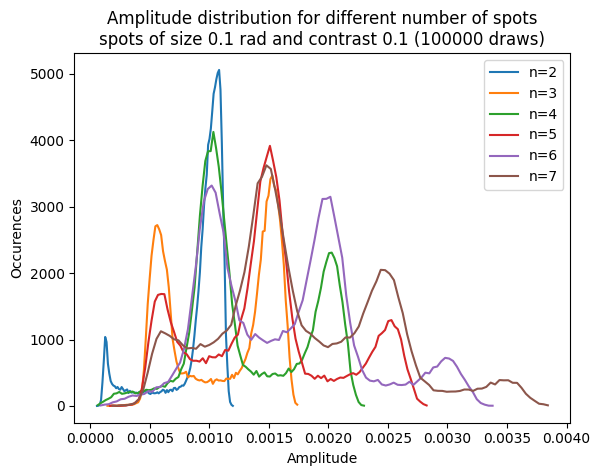

In [5]:
for n, A in results.items():
    x, bins = np.histogram(A[:, 2], bins=100)
    plt.plot(bins[:-1], x, label=f"n={n}")

plt.legend()
plt.xlabel("Amplitude")
plt.ylabel("Occurences")
plt.title(
    f"Amplitude distribution for different number of spots\nspots of size 0.1 rad and contrast 0.1 ({draws} draws)"
)
plt.savefig("spotter_number_experiement.pdf")

## Radius

In [6]:
results = {}

for s in np.linspace(0.05, 0.6, 6):
    A = []
    for i in range(draws):
        star.clear_surface()
        theta, phi = uniform(4)
        star.add_spot(theta, phi, s, 0.1)
        A.append([theta[0], phi[0], amplitude(star.map_spot)])
    A = np.array(A)
    results[s] = A

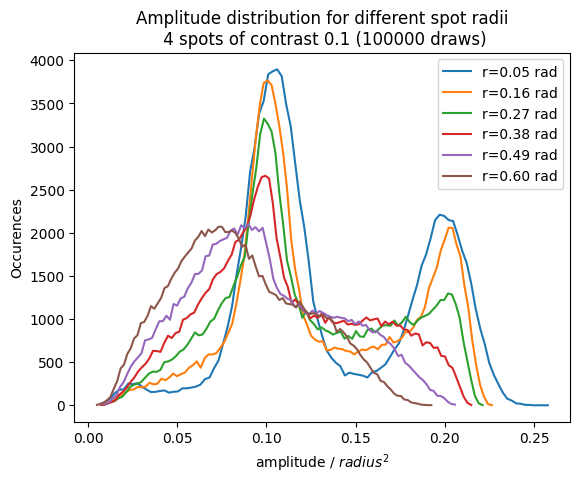

In [7]:
for r, A in results.items():
    x, bins = np.histogram(A[:, 2], bins=100)
    plt.plot(bins[:-1] / r**2, x, label=f"r={r:.2f} rad")

plt.legend()
plt.xlabel("amplitude / $radius^2$")
plt.ylabel("Occurences")
plt.title(
    f"Amplitude distribution for different spot radii\n 4 spots of contrast 0.1 ({draws} draws)"
)
plt.savefig("spotter_radius_experiement.pdf")